In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
# Загрузка данных Титаника из csv-файла
data = pd.read_csv('titanic.csv')
data = data [['Survived','Pclass','Age','Fare']]
data = data.dropna(subset=['Age'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [4]:
data.Fare.describe()

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64

In [5]:
data.drop('Survived', axis=1)

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
885,3,39.0,29.1250
886,2,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [6]:
# Разделение данных на обучающую и тестовую выборки
train, test = train_test_split(data, test_size=0.2)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Функция для построения матрицы ошибок.
    cm - матрица ошибок
    classes - список классов
    normalize - если True, то значения матрицы ошибок нормализуются к 1
    title - заголовок графика
    cmap - цветовая схема для отображения графика
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy 0.6923076923076923
Confusion matrix, without normalization
              precision    recall  f1-score   support

Not Survived       0.77      0.73      0.75        90
    Survived       0.58      0.62      0.60        53

    accuracy                           0.69       143
   macro avg       0.67      0.68      0.68       143
weighted avg       0.70      0.69      0.69       143



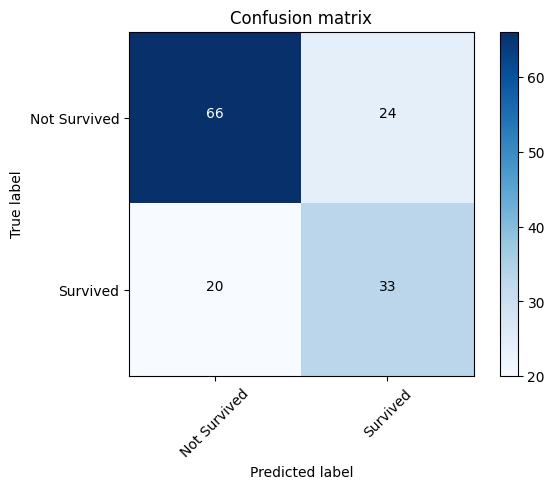

In [8]:
def experiment(max_depth, min_samples_split):
    # Создание и обучение модели решающего дерева
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(train.drop('Survived', axis=1), train['Survived'])

    # Вычисление метрик 
    preds = model.predict(test.drop('Survived', axis=1))
    acc = accuracy_score(test['Survived'], preds)
    cm = confusion_matrix(test['Survived'], preds)

    print("accuracy", acc)

    # Визуализация матрицы ошибок
    plot_confusion_matrix(cm, classes=['Not Survived', 'Survived'])

    # Вывод classification report
    report = classification_report(test['Survived'], preds, target_names=['Not Survived', 'Survived'])
    print(report)

    # Сохранение модели в формате pickle
    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)


# Определение гиперпараметров модели
max_depth = 5
min_samples_split = 150

experiment(max_depth, min_samples_split)

----

## Инференс

In [9]:
import pickle

# Загрузка модели из файла pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [10]:
import pandas as pd

# Новые данные
new_data = pd.DataFrame({
    'Pclass': [3],
    'Age': [5.0],
    'Fare': [7.2500]
})

In [11]:
# Предсказание
predictions = model.predict(new_data)

# Вывод результатов
print("Predicted Survival:", predictions)

Predicted Survival: [1]


---

## Test API

In [13]:
import requests

def predict_model(data):
    url = 'http://127.0.0.1:8000/predict_model'

    # Отправка POST-запроса с данными в формате форм-данных
    response = requests.post(url, json=data)

    # Проверка статуса ответа
    if response.status_code == 200:
        return response.json()
    else:
        return {"error": f"Request failed with status code {response.status_code}"}

# Пример данных для предсказания
data = {
    "Pclass": 3,
    "Age": 22.0,
    "Fare": 10.250
}

# Получение предсказания
prediction = predict_model(data)
print(prediction)

{'prediction': 'Not Survived'}
